In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import display, Javascript


drive.mount('/content/drive')
# Load model
model_path = '/content/drive/MyDrive/AIUB/CVPR/Final/22_face_recognition_model.keras'  # Path to your model is saved from train
model = keras.models.load_model(model_path)

# Load class
base_path = '/content/drive/MyDrive/AIUB/CVPR/Final/data'     # Path to your data set folder to extract class
class_names = sorted(os.listdir(base_path))

print("Model & classes loaded")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model & classes loaded


In [41]:
def take_photo(filename='camera.jpg', quality=0.8):
    """
    Capture photo from webcam in Colab.
    Returns: path to saved photo
    """
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.border = '2px solid black';
      video.style.width = '400px';
      div.appendChild(video);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();


      await new Promise(resolve => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


In [42]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # grayscale
    img = img.resize((64, 64))
    img = np.array(img) / 255.0
    img = img.reshape(1, 64, 64, 1)
    return img


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


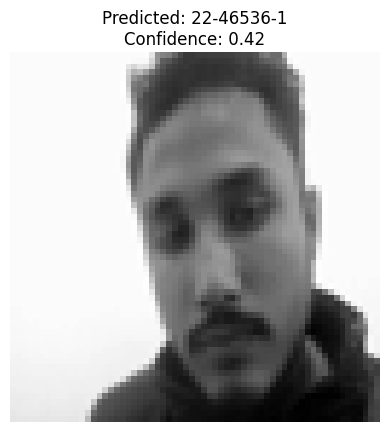

In [47]:
# Capture image
image_path = take_photo()

#  Preprocess
img = preprocess_image(image_path)

#  Predict
predictions = model.predict(img)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

# Show result
plt.imshow(img.reshape(64,64), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()
